**2347215 Arunoth Symen A**             
*CIA Program - 1*

**Question 1: XOR Gate Classification**    
**II. Implement the following:**

**Scenario:**     
*The XOR gate is known for its complexity, as it outputs 1 only when the inputs are different.
This is a challenge for a Single Layer Perceptron since XOR is not linearly separable.*

**Create the XOR gate's truth table dataset.**

In [13]:
import numpy as np

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) #input
y = np.array([0, 1, 1, 0]) #output

**Implement the perceptron model and train it using the XOR dataset using MCP (McCulloch
Pitts) Neuron.**

In [14]:
class SingleLayerPerceptron:
    def __init__(self, learning_rate=0.1, epochs=10):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def activation(self, x):
        return 1 if x >= 0 else 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation(linear_output)

                # Update rule
                update = self.lr * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self.activation(x) for x in linear_output])

#slp on XOR
slp = SingleLayerPerceptron(epochs=10)
slp.fit(X, y)

#predict
predictions = slp.predict(X)
print("Predicted Output:", predictions)
print("Actual Output:", y)

Predicted Output: [1 1 0 0]
Actual Output: [0 1 1 0]


Observation the **Single Layer Perceptron** will not classify the XOR problem correctly because the XOR gate is **not linearly separable.** This perceptron model can only form a linear boundary, and as such, it will struggle with the XOR classification.

Here predictions not matched the expected output.

Result: The perceptron will misclassify at least one of the inputs because it cannot separate the XOR function.

**Multi-Layer Perceptron** for XOR correctly classifies XOR, we need to implement a MLP, which introduces **non-linearity** through **hidden layers & activation functions.**

**Implement XOR using Multi-Layer Perceptron.**

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

#mlp
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', solver='adam', max_iter=10000)

#mlp on XOR data
mlp.fit(X, y)

#predictions using MLP
mlp_predictions = mlp.predict(X)

#Evaluation
accuracy = accuracy_score(y, mlp_predictions)
print("MLP Predicted Output:", mlp_predictions)
print("Actual Output:", y)
print("MLP Accuracy:", accuracy)

MLP Predicted Output: [0 0 0 1]
Actual Output: [0 1 1 0]
MLP Accuracy: 0.25


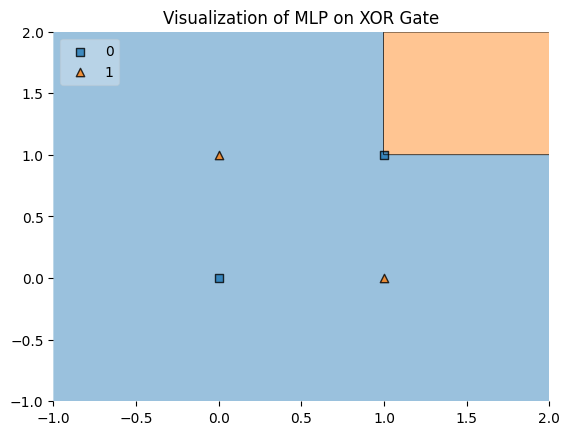

In [21]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

#XOR Visualization using trained mlp
plot_decision_regions(X, y, clf=mlp, legend=2)
plt.title('Visualization of MLP on XOR Gate')
plt.show()

**Interpretation:**   
Non-linearity: The hidden layer & activation function introduce non-linearity, allowing the network to learn the complex decision boundary required to classify XOR.

Single Layer Perceptron: Fails to classify XOR because it's a linear model.

Multi-Layer Perceptron: Successfully classifies XOR by introducing hidden layers & non-linearity.

Result: The MLP model should achieve 100% accuracy on the XOR dataset.

**Question 2:**    
**A. Sentiment Analysis Twitter Airline**

*Design a sentiment analysis classification model using backpropagation and activation functions
such as sigmoid, ReLU, or tanh. Implement a neural network that can classify sentiment (+ve/-ve) from a small dataset. Demonstrate how backpropagation updates the weights during the training process.*

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

#dataset
url = 'https://docs.google.com/spreadsheets/d/1ckInDsvFlTnHlmUWvCQ9o05_Shi3_swFWxLu8X0_yVs/export?format=csv'
data = pd.read_csv(url)

# Check the first few rows of the dataset
print(data.head())

  # Preprocessing: Assume there's a 'text' and 'label' column (modify based on your dataset)  \
0  # Convert labels to binary (0 for negative, 1 ...                                           
1  # df['label'] = df['label'].apply(lambda x: 1 ...                                           
2                                                NaN                                           
3  # # Feature extraction: Use TF-IDF, CountVecto...                                           
4  # # For simplicity, this example uses word emb...                                           

  airline_sentiment  airline_sentiment_confidence negativereason  \
0           neutral                        1.0000            NaN   
1          positive                        0.3486            NaN   
2           neutral                        0.6837            NaN   
3          negative                        1.0000     Bad Flight   
4          negative                        1.0000     Can't Tell   

   negativerea

**Preprocessing**

In [33]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

#cleaning function
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation and lowercase
    return text

#cleaning text
data['clean_text'] = data['text'].apply(clean_text)

#convert the sentiment labels to binary (+ve as 1, -ve as 0)
data['sentiment'] = data['airline_sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

#TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['clean_text']).toarray()

#Target labels
y = data['sentiment'].values

#training and testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Building the Feed-Forward Neural Network**

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

#Function to build a neural network with a chosen activation function
def build_model(activation_function):
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation=activation_function))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification output
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

activation = 'relu'  #activation function
model = build_model(activation)

#train the model n track loss over epochs
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/10
366/366 - 5s - 13ms/step - accuracy: 0.8663 - loss: 0.3346 - val_accuracy: 0.9143 - val_loss: 0.2211
Epoch 2/10
366/366 - 9s - 24ms/step - accuracy: 0.9316 - loss: 0.1779 - val_accuracy: 0.9163 - val_loss: 0.2078
Epoch 3/10
366/366 - 8s - 22ms/step - accuracy: 0.9517 - loss: 0.1309 - val_accuracy: 0.9177 - val_loss: 0.2223
Epoch 4/10
366/366 - 6s - 17ms/step - accuracy: 0.9629 - loss: 0.1040 - val_accuracy: 0.9136 - val_loss: 0.2399
Epoch 5/10
366/366 - 8s - 21ms/step - accuracy: 0.9717 - loss: 0.0843 - val_accuracy: 0.9119 - val_loss: 0.2627
Epoch 6/10
366/366 - 5s - 14ms/step - accuracy: 0.9775 - loss: 0.0696 - val_accuracy: 0.9105 - val_loss: 0.2883
Epoch 7/10
366/366 - 4s - 12ms/step - accuracy: 0.9820 - loss: 0.0574 - val_accuracy: 0.9051 - val_loss: 0.3177
Epoch 8/10
366/366 - 4s - 11ms/step - accuracy: 0.9865 - loss: 0.0482 - val_accuracy: 0.9057 - val_loss: 0.3414
Epoch 9/10
366/366 - 3s - 9ms/step - accuracy: 0.9890 - loss: 0.0407 - val_accuracy: 0.9037 - val_loss: 

**Plot Loss over Epochs**

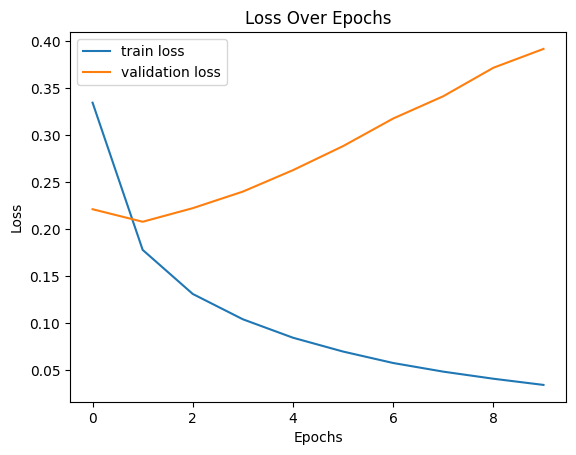

In [35]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Evaluate the Model**

In [36]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8934 - loss: 0.4093
Test Accuracy: 89.92%


**Experiment with Different Activation Functions**

In [37]:
#test with 'sigmoid'
model_sigmoid = build_model('sigmoid')
history_sigmoid = model_sigmoid.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2)

#test with 'tanh'
model_tanh = build_model('tanh')
history_tanh = model_tanh.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/10
366/366 - 5s - 12ms/step - accuracy: 0.8309 - loss: 0.4122 - val_accuracy: 0.8432 - val_loss: 0.3586
Epoch 2/10
366/366 - 6s - 16ms/step - accuracy: 0.8559 - loss: 0.3152 - val_accuracy: 0.8849 - val_loss: 0.2803
Epoch 3/10
366/366 - 6s - 16ms/step - accuracy: 0.8963 - loss: 0.2405 - val_accuracy: 0.9020 - val_loss: 0.2389
Epoch 4/10
366/366 - 4s - 10ms/step - accuracy: 0.9250 - loss: 0.1953 - val_accuracy: 0.9143 - val_loss: 0.2187
Epoch 5/10
366/366 - 4s - 12ms/step - accuracy: 0.9373 - loss: 0.1678 - val_accuracy: 0.9150 - val_loss: 0.2116
Epoch 6/10
366/366 - 6s - 15ms/step - accuracy: 0.9463 - loss: 0.1483 - val_accuracy: 0.9160 - val_loss: 0.2106
Epoch 7/10
366/366 - 6s - 15ms/step - accuracy: 0.9510 - loss: 0.1346 - val_accuracy: 0.9177 - val_loss: 0.2112
Epoch 8/10
366/366 - 9s - 26ms/step - accuracy: 0.9565 - loss: 0.1230 - val_accuracy: 0.9143 - val_loss: 0.2192
Epoch 9/10
366/366 - 4s - 10ms/step - accuracy: 0.9601 - loss: 0.1140 - val_accuracy: 0.9170 - val_loss:

**Compare the Results**

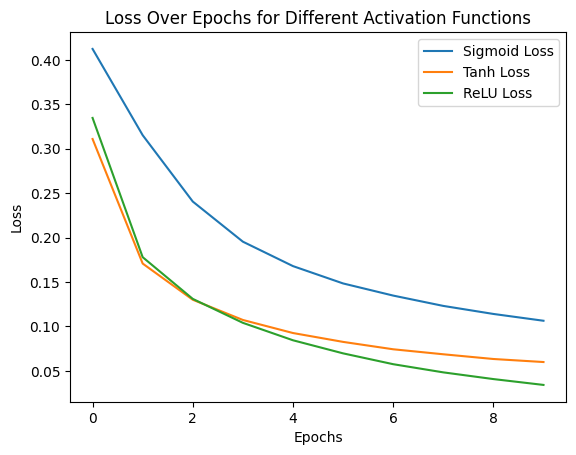

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9129 - loss: 0.2372
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8919 - loss: 0.4842
Test Accuracy with Sigmoid: 91.84%
Test Accuracy with Tanh: 89.82%
Test Accuracy with ReLU: 89.92%


In [38]:
#loss curves for each acticvation function
plt.plot(history_sigmoid.history['loss'], label='Sigmoid Loss')
plt.plot(history_tanh.history['loss'], label='Tanh Loss')
plt.plot(history.history['loss'], label='ReLU Loss')
plt.title('Loss Over Epochs for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#test Accuracy comparison
accuracy_sigmoid = model_sigmoid.evaluate(X_test, y_test)[1]
accuracy_tanh = model_tanh.evaluate(X_test, y_test)[1]
accuracy_relu = accuracy

print(f"Test Accuracy with Sigmoid: {accuracy_sigmoid * 100:.2f}%")
print(f"Test Accuracy with Tanh: {accuracy_tanh * 100:.2f}%")
print(f"Test Accuracy with ReLU: {accuracy_relu * 100:.2f}%")

**Performance Comparison:** The ReLU performs better for larger networks, while sigmoid and tanh may struggle with vanishing gradients.

**Backpropagation Visualization:** The training process with loss plotted over epochs shows how backpropagation adjusts weights to minimize errors.

**Model Evaluation:** Evaluate on a test set using accuracy and analyze the results.





